In [66]:
pip install pandas matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 1.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


In [51]:
df = pd.read_csv('titanic.csv')
target = 'Survived'

In [68]:
# Display the first few rows of the dataset
print(df.head())

# Check the dimensions of the dataset
print(df.shape)

# Get summary statistics of numerical variables
print(df.describe())

# Check the data types of variables
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
(889, 11)
       PassengerId    Surviv

In [69]:
mean_values = df.select_dtypes(include=['number']).mean()

# Then, use fillna() on the DataFrame, passing the dictionary to fill each column with its respective mean
df = df.fillna(value=mean_values)

# Define the threshold for when to drop columns instead of rows
missing_threshold = 0.25

# Iterate through each column in the DataFrame
for column in df.columns:
    missing_percentage = df[column].isnull().mean()  # Calculate the percentage of missing values

    # Check if the column is non-numeric and has more than 25% missing values
    if not pd.api.types.is_numeric_dtype(df[column]) and missing_percentage > missing_threshold:
        # Drop the column
        df.drop(column, axis=1, inplace=True)
        print(f"Removed the entire column '{column}' because more than 25% of its values were missing.")
    elif missing_percentage > 0:
        # If it's not above the threshold or it's numeric, drop rows with missing values in this column
        initial_row_count = df.shape[0]
        df = df[df[column].notna()]
        rows_dropped = initial_row_count - df.shape[0]
        print(f"Removed {rows_dropped} rows due to missing values in the '{column}' column.")

# Optionally, display the DataFrame to see the remaining data
print("Here is how the first few rows of the cleaned dataset look:")
print(df.head())
print("Summary of missing values per column after cleaning:")
print(df.isnull().sum())

Here is how the first few rows of the cleaned dataset look:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            37345

In [70]:
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

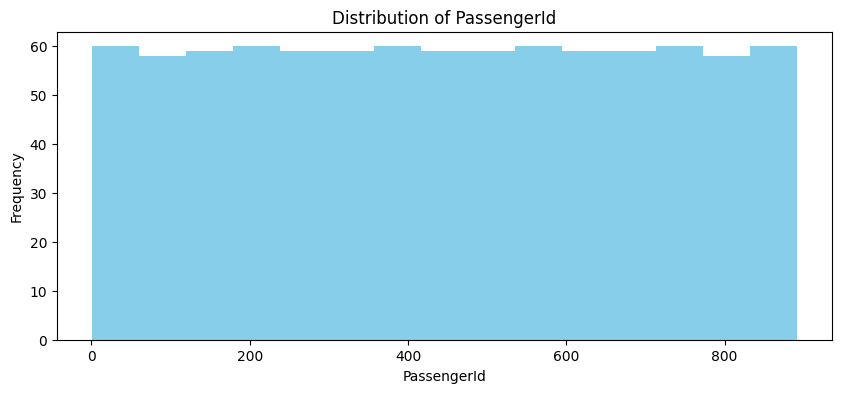

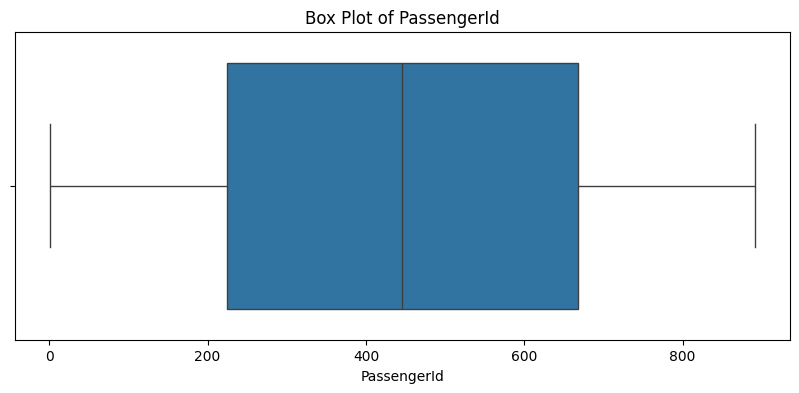

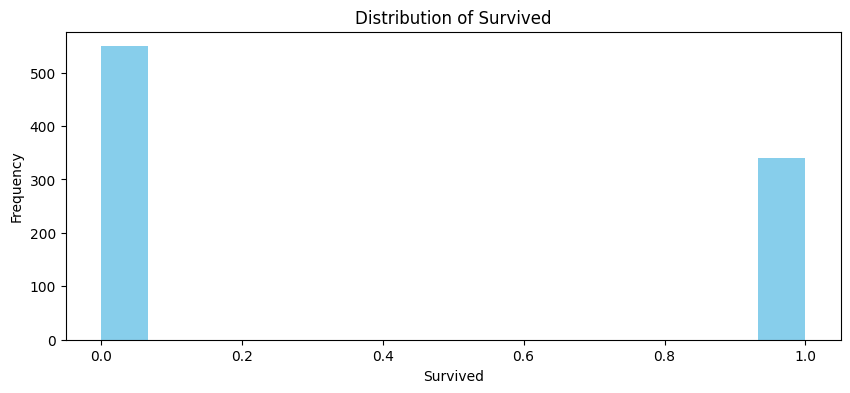

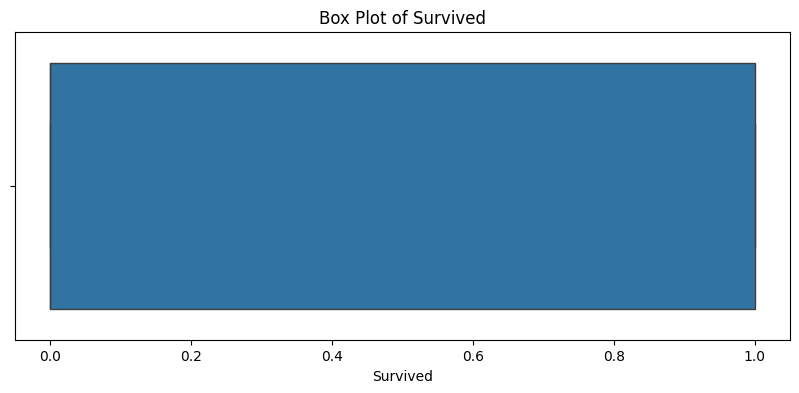

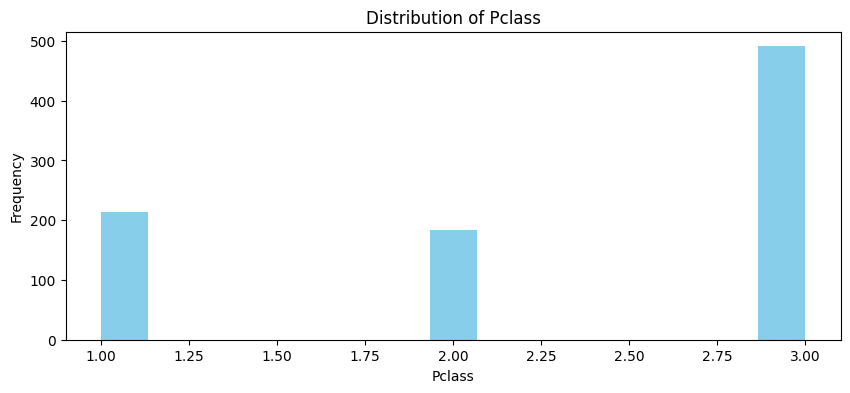

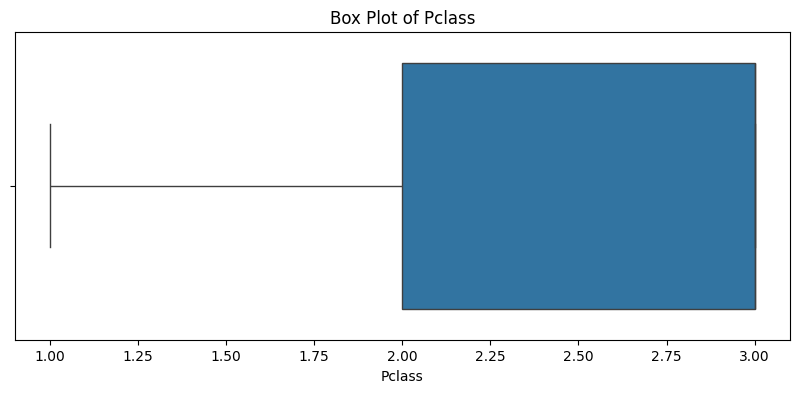

/var/folders/mv/1wspd8ss21x8drphht5pcly80000gn/T/ipykernel_63041/381801578.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(series) or series.dtype == object:


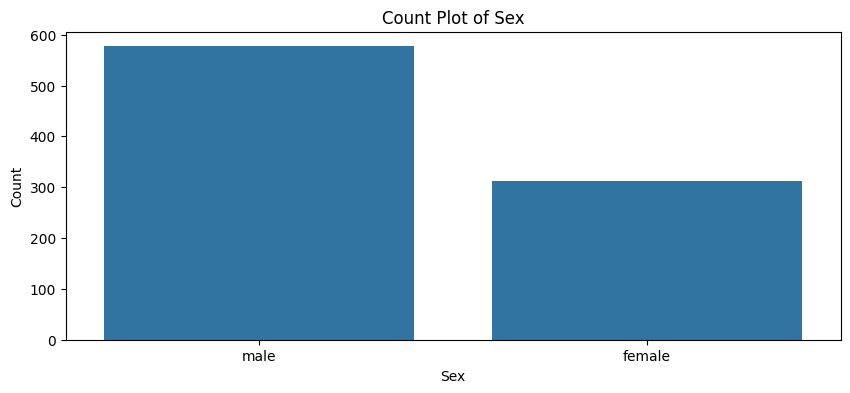

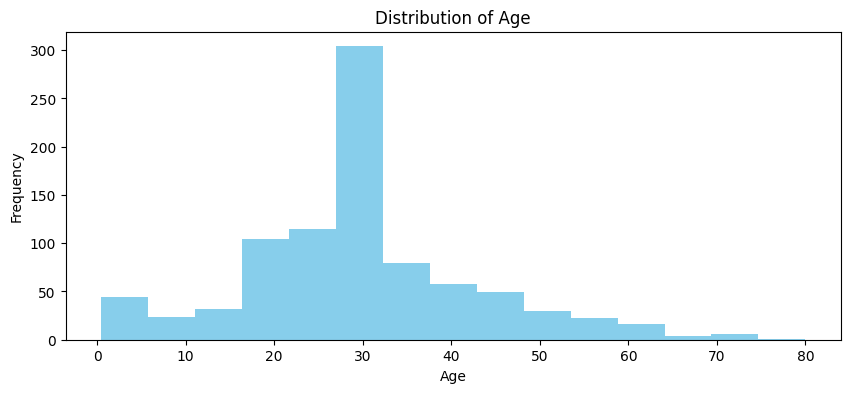

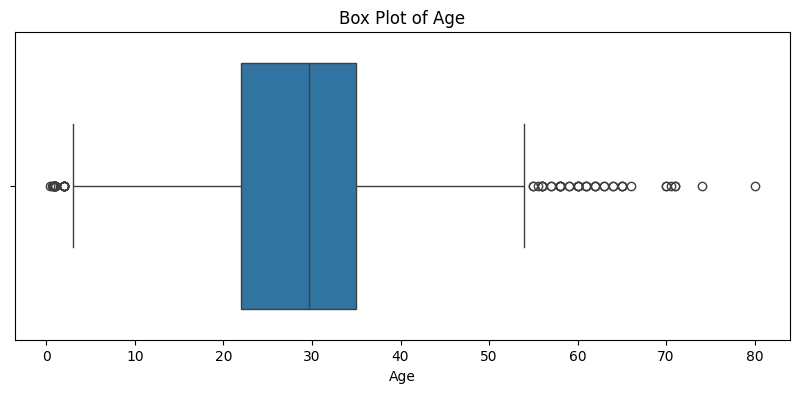

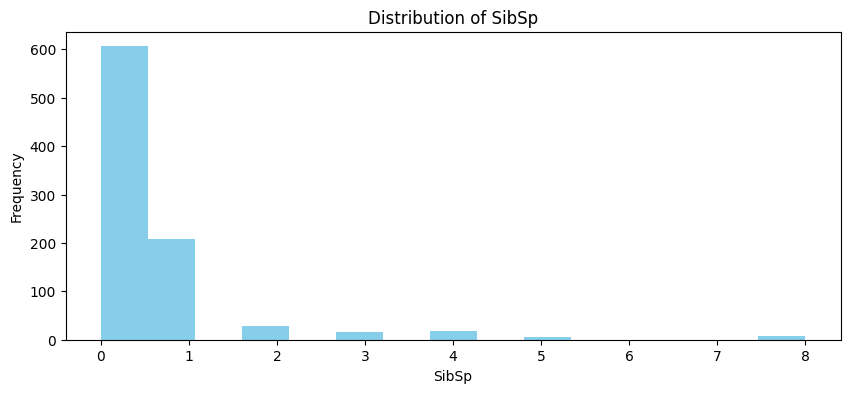

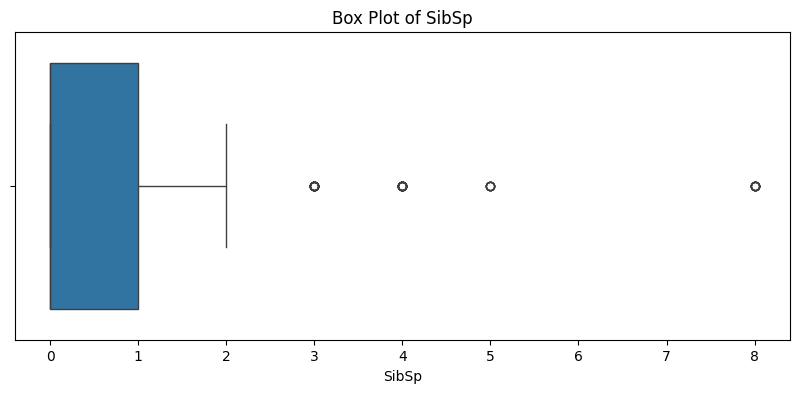

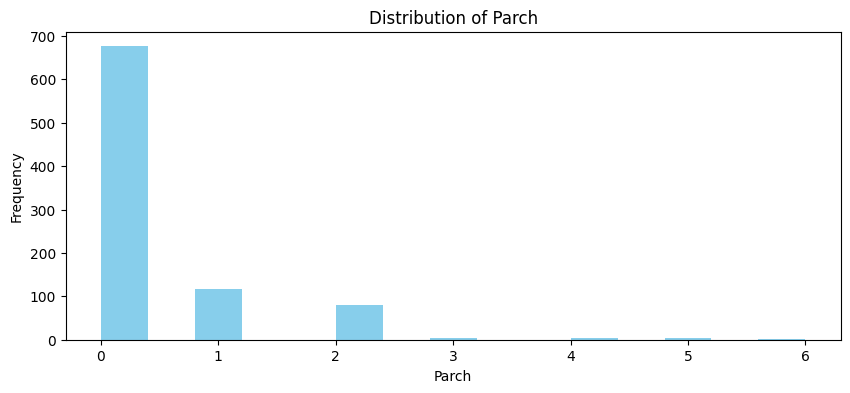

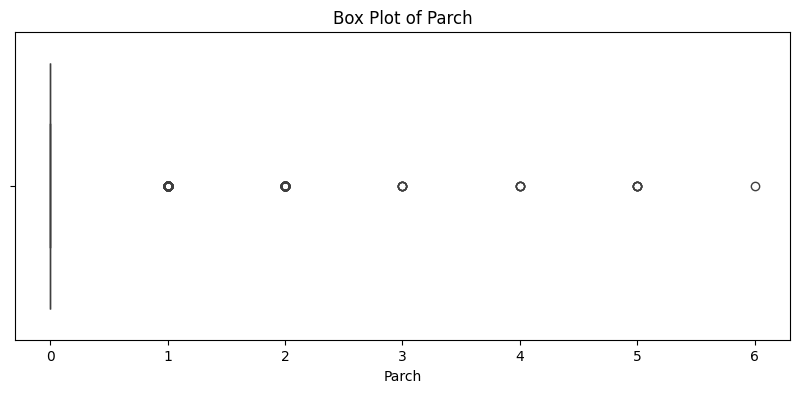

/var/folders/mv/1wspd8ss21x8drphht5pcly80000gn/T/ipykernel_63041/381801578.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(series) or series.dtype == object:


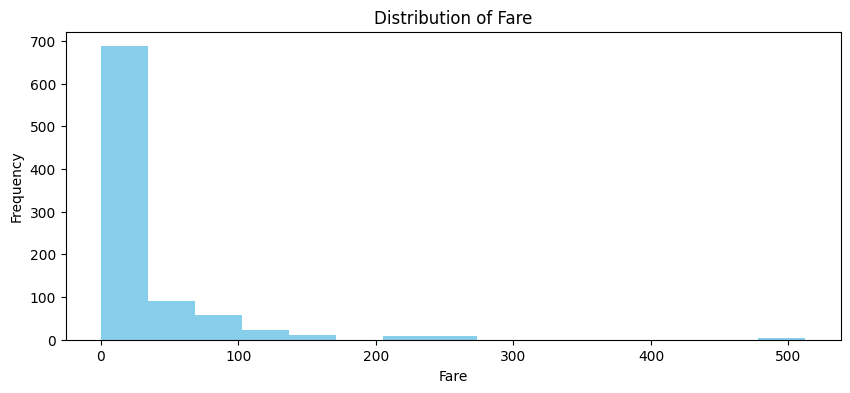

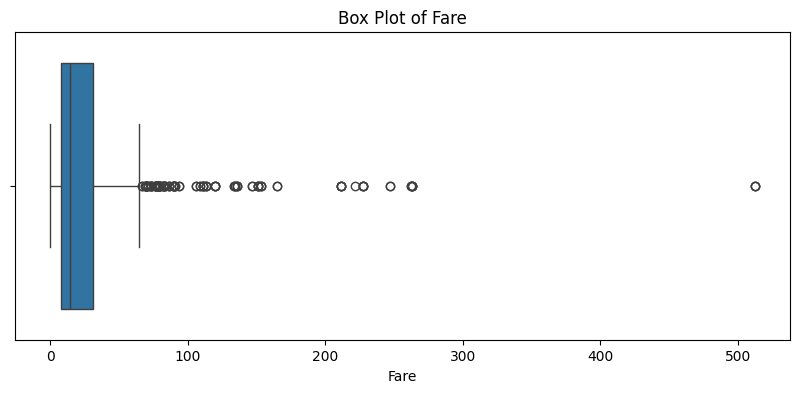

/var/folders/mv/1wspd8ss21x8drphht5pcly80000gn/T/ipykernel_63041/381801578.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(series) or series.dtype == object:


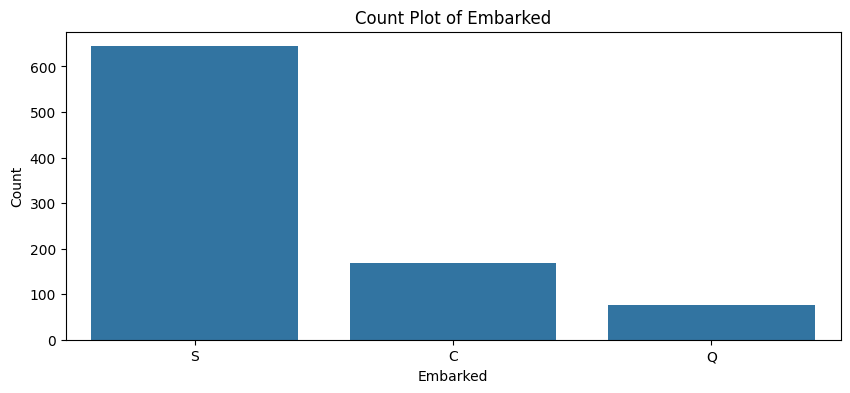

In [71]:

def is_plotable(series):
    """ Check if the column is suitable for plotting. """
    if series.nunique() > 20:  # Adjust the threshold as needed
        return False
    return True

# Function to determine if a column is numeric
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

# Function to determine if a column is categorical with a reasonable number of unique values
def is_categorical(series):
    if pd.api.types.is_categorical_dtype(series) or series.dtype == object:
        return is_plotable(series)
    return False

# Plot each column in the DataFrame
for column in df.columns:
    # Skip columns with high cardinality or non-informative data
    if column in ['Id', 'Name', 'Original_name']:  # Add other columns to skip as necessary
        continue
    
    if is_numeric(df[column]):
        # Histogram for numeric data
        plt.figure(figsize=(10, 4))
        plt.hist(df[column].dropna(), bins=15, color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

        # Box plot for numeric data
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column].dropna())
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

    elif is_categorical(df[column]):
        # Count plot for categorical data
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, data=df)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

In [72]:
def plot_histograms(df, bins=10, figsize=(10, 5)):
    """
    Plot histograms for all numeric columns in the DataFrame.

    Args:
    df (DataFrame): The pandas DataFrame containing the data.
    bins (int, optional): Number of bins for the histogram. Default is 10.
    figsize (tuple, optional): Figure size, given as (width, height). Default is (10, 5).
    """
    # Identify numeric columns by checking if they can be coerced to numeric types
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create a histogram for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=figsize)
        plt.hist(df[column].dropna(), bins=bins, color='skyblue', edgecolor='black')  # Drop NA values for plotting
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

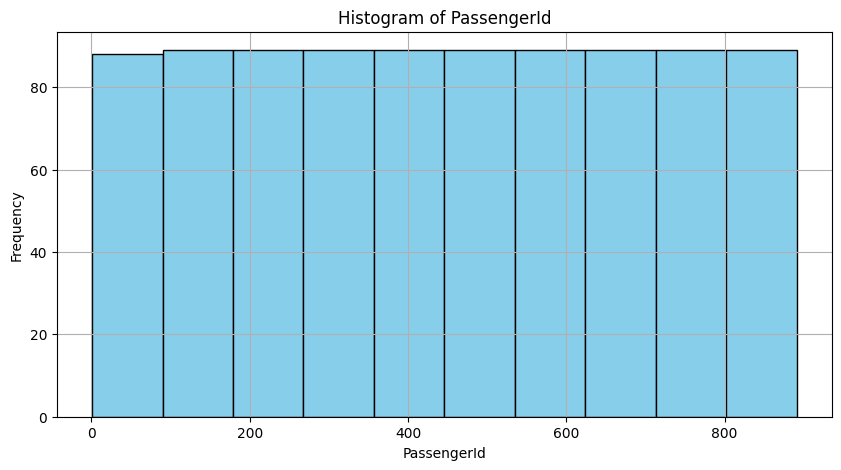

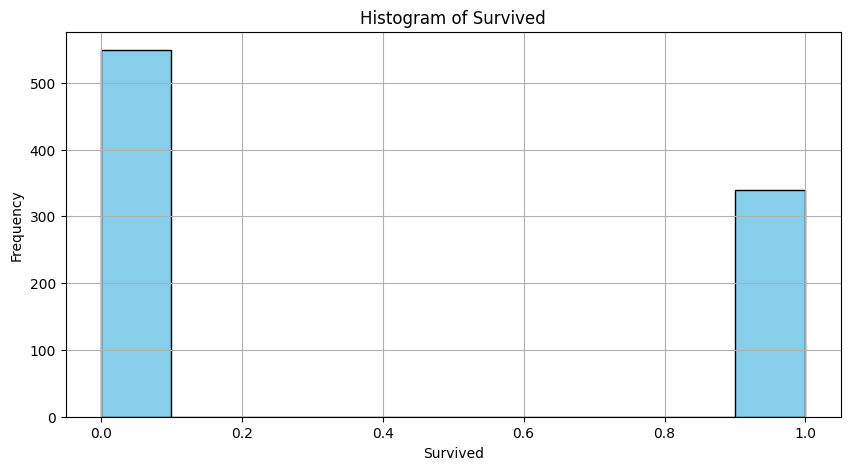

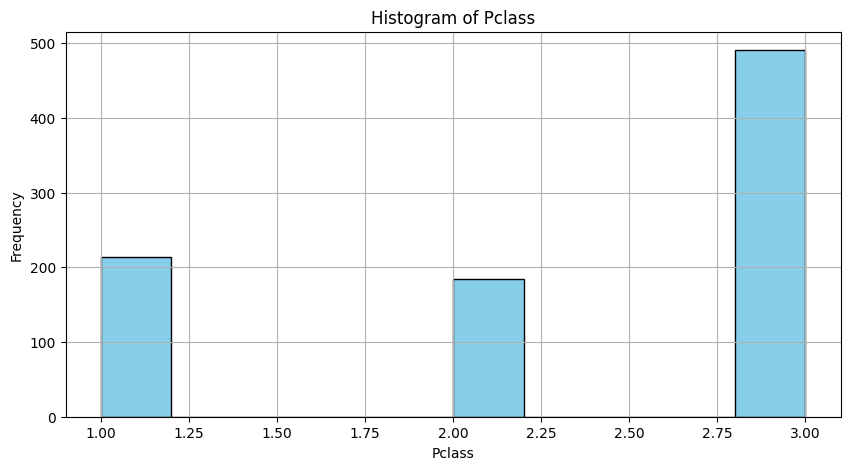

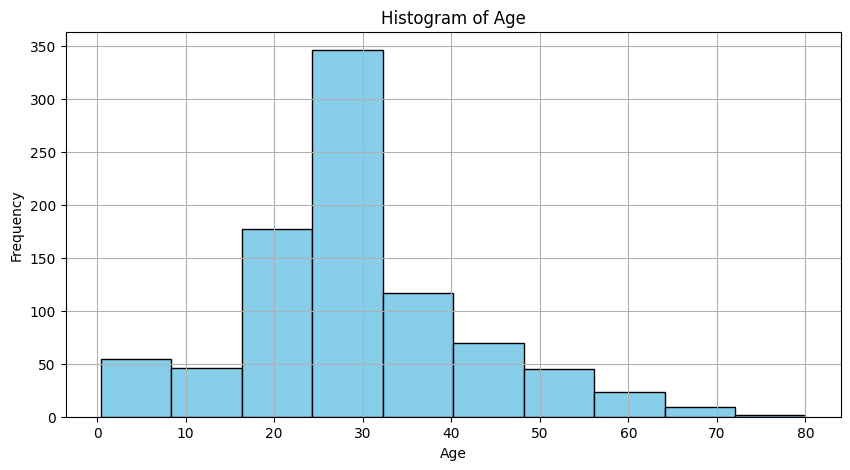

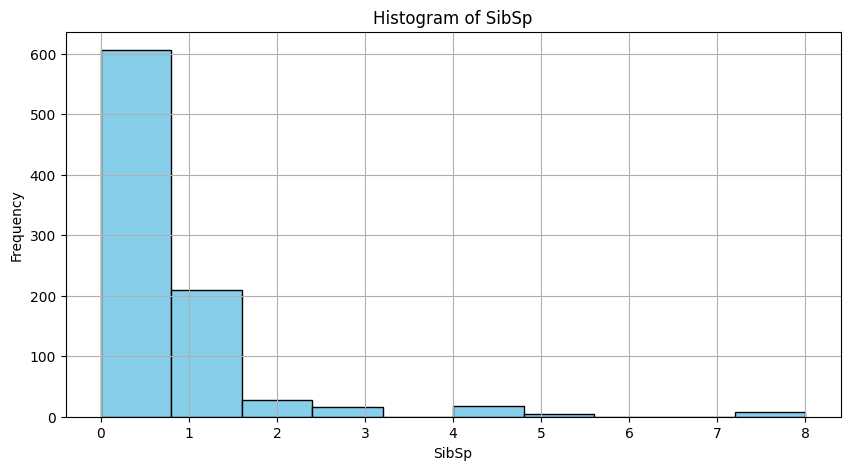

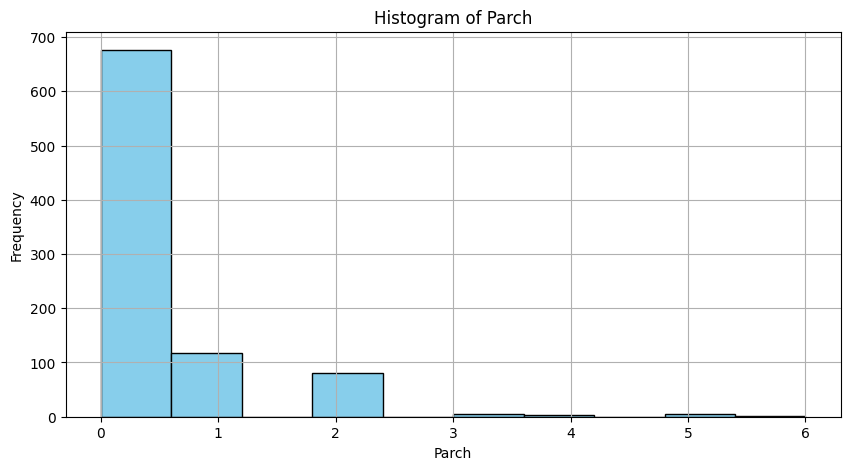

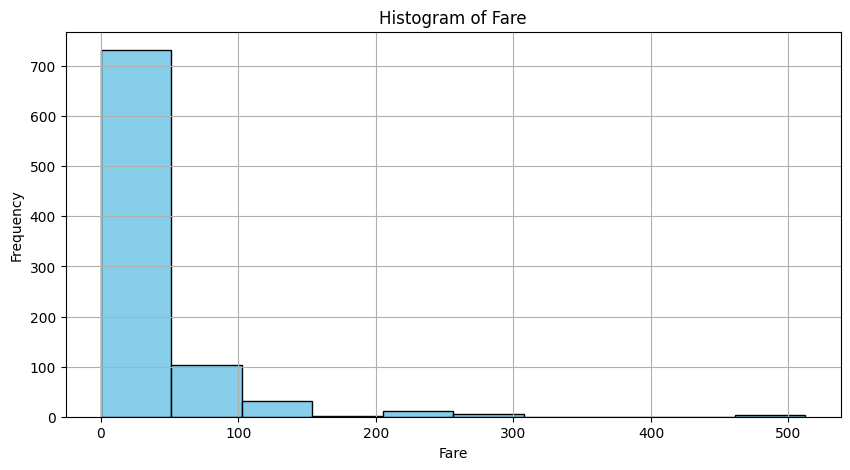

In [73]:
plot_histograms(df)

Correlation matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088604  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


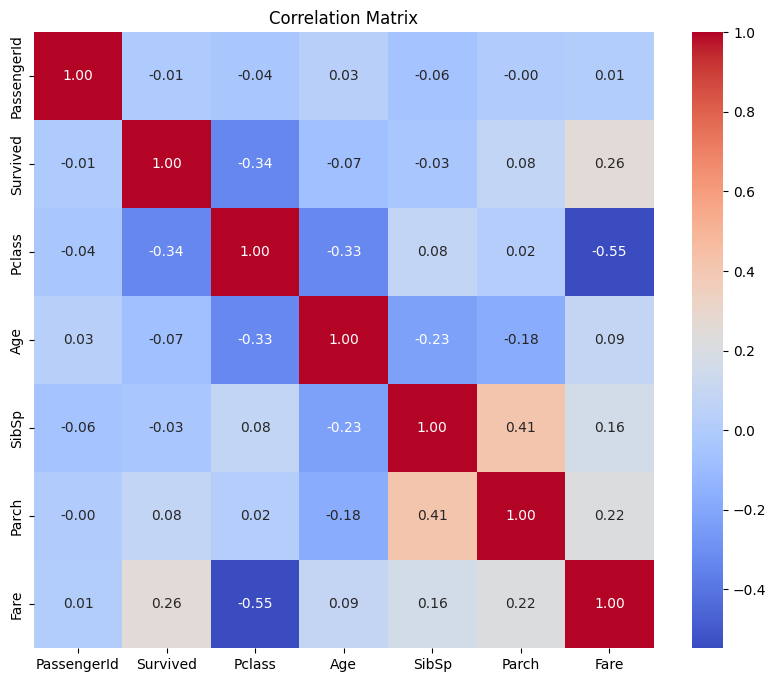

Cross-tabulation between Sex and Embarked:
 Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


Correlation with target for numeric features:
 PassengerId   -0.005028
Pclass        -0.335549
Age           -0.074673
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Name: Survived, dtype: float64


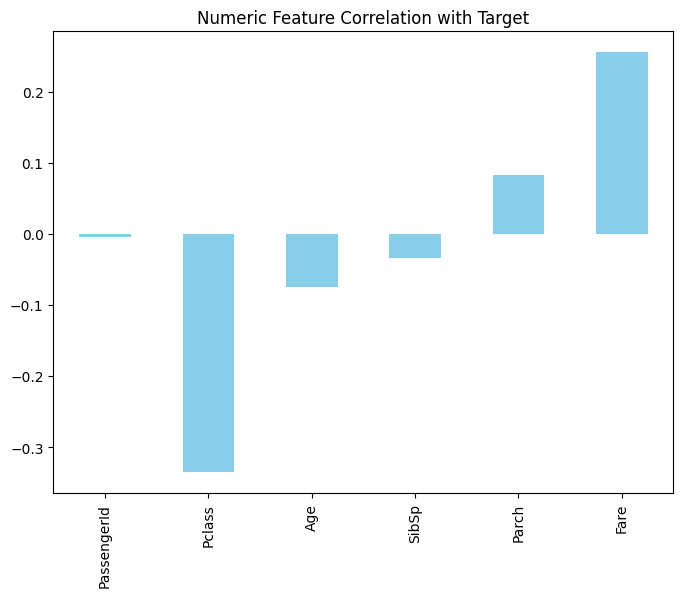

ValueError: could not convert string to float: 'male'

In [74]:
def is_numeric(series):
    """Check if a column is numeric."""
    return pd.api.types.is_numeric_dtype(series)

def is_categorical(series, threshold=10):
    """Check if a column is categorical based on a threshold for unique counts."""
    return series.dtype == object and series.nunique() <= threshold

def analyze_correlations(df):
    """Analyze and plot correlations for numeric columns."""
    numeric_columns = [col for col in df.columns if is_numeric(df[col])]
    if len(numeric_columns) > 1:
        correlation_matrix = df[numeric_columns].corr()
        print("Correlation matrix:\n", correlation_matrix)

        # Highlight strong correlations that might affect model performance
        strong_correlations = correlation_matrix.abs() > 0.8
        if strong_correlations.any().any():
            print("Warning: Strong correlations detected, which may lead to multicollinearity if used in linear models.")

        # Display heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

def analyze_categoricals(df):
    """Analyze interactions between categorical columns via cross-tabulation."""
    categorical_columns = [col for col in df.columns if is_categorical(df[col])]
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
            print(f"Cross-tabulation between {categorical_columns[i]} and {categorical_columns[j]}:\n", cross_tab)
            print("\n")

def feature_importance_with_target(df, target):
    """Assess feature importance with respect to the target variable."""
    numeric_columns = [col for col in df.columns if is_numeric(df[col]) and col != target]
    categorical_columns = [col for col in df.columns if is_categorical(df[col]) and col != target]

    # Correlation for numeric columns
    if numeric_columns:
        target_corr = df[numeric_columns + [target]].corr()[target].drop(target)
        print("Correlation with target for numeric features:\n", target_corr)
        plt.figure(figsize=(8, 6))
        target_corr.plot(kind='bar', color='skyblue')
        plt.title('Numeric Feature Correlation with Target')
        plt.show()

    # Mutual information for categorical columns
    if categorical_columns:
        mi_scores = mutual_info_classif(df[categorical_columns], df[target], discrete_features=True)
        mi_scores = pd.Series(mi_scores, index=categorical_columns)
        print("Mutual Information with target for categorical features:\n", mi_scores)
        plt.figure(figsize=(8, 6))
        mi_scores.sort_values(ascending=False).plot(kind='bar', color='salmon')
        plt.title('Categorical Feature Mutual Information with Target')
        plt.show()

# Assuming df is loaded and target column is known
# df = pd.read_csv('path/to/your/data.csv')
analyze_correlations(df)
analyze_categoricals(df)
feature_importance_with_target(df, target)